In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import shapiro, kstest, norm, probplot
import seaborn as sns

In [2]:
file_path = Path('Resources/Heart_Disease.csv')
df = pd.read_csv(file_path)
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


In [3]:
# Mapping yes/no and female/male columns to binary numeric
df['CHDRisk'] = df['CHDRisk'].map({'yes': 1, 'no': 0})
df['diabetes'] = df['diabetes'].map({'yes': 1, 'no': 0})
df['smokingStatus'] = df['smokingStatus'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,1.0,39,4,0.0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0.0,46,2,0.0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1.0,48,1,1.0,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0.0,61,3,1.0,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0.0,46,3,1.0,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [4]:
# Checking nulls
null_values = df.isnull().sum()
null_values

sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64

In [5]:
print(f'The number of rows before dropping null values is {df.shape[0]}')

The number of rows before dropping null values is 3674


In [6]:
df_cleaned = df.dropna()

In [7]:
print(f'The number of rows after dropping null values is {df_cleaned.shape[0]}')

The number of rows after dropping null values is 3652


In [8]:
# Investigating if there's duplicate rows in the data set
df_cleaned.duplicated().sum().sum()
df_cleaned[df_cleaned.duplicated()]

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
3658,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3659,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3660,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3661,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3662,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3663,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3664,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3665,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3666,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3667,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1


In [9]:
# Dropping the duplicate rows 
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.duplicated().sum()

C:\Users\emily\AppData\Local\Temp\ipykernel_21844\1688593351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


0

# Exploring the target variable

## Analysing the distribution of the target variable

c:\Users\emily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


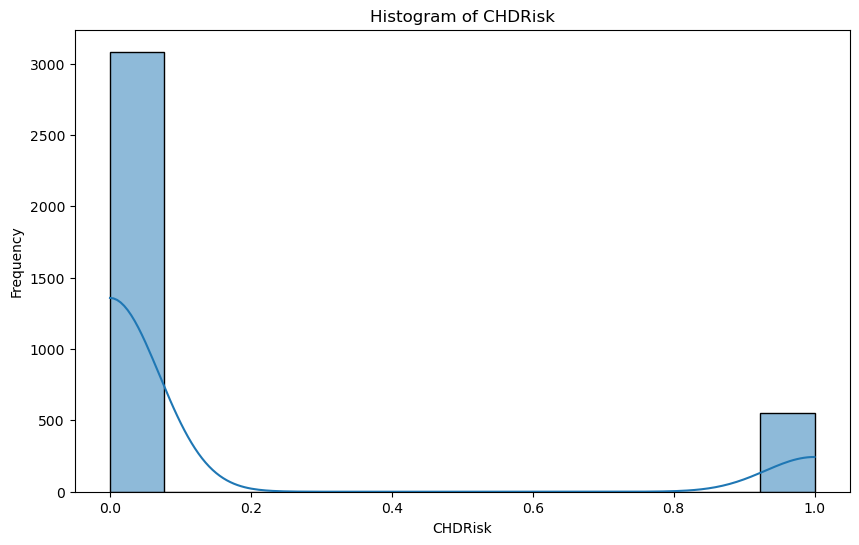

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CHDRisk'], kde=True)
plt.xlabel('CHDRisk')
plt.ylabel('Frequency')
plt.title('Histogram of CHDRisk')
plt.show()

In [11]:
df_cleaned['CHDRisk'].value_counts()

CHDRisk
0    3084
1     553
Name: count, dtype: int64

In [12]:
stat, p = shapiro(df_cleaned['CHDRisk'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=0.429, p=0.000


Interpreting the Shapiro-Wilk test: a test statistic of 0.43 indicates the target variable is not normally distributed.

## Analyzing the IID (Independent and Identically Distributed) nature of the target variable

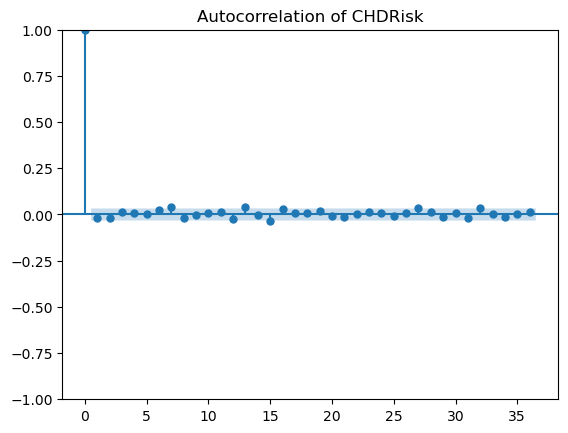

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation function
plot_acf(df_cleaned['CHDRisk'])
plt.title('Autocorrelation of CHDRisk')
plt.show()


In [14]:
# Splitting the data and comparing to check for identical distribtuion
from scipy.stats import ks_2samp

# Split data into two halves
first_half = df_cleaned['CHDRisk'].iloc[:len(df)//2]
second_half = df_cleaned['CHDRisk'].iloc[len(df)//2:]

# Perform Kolmogorov-Smirnov test
stat, p_value = ks_2samp(first_half, second_half)
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpretation
if p_value > 0.05:
    print("The two halves of the data come from the same distribution (fail to reject H0)")
else:
    print("The two halves of the data do not come from the same distribution (reject H0)")


Kolmogorov-Smirnov Test: Statistics=0.001, p=1.000
The two halves of the data come from the same distribution (fail to reject H0)


Interpretation: the target variable is identically distributed. IID is an important assumption that all ML is built off of, but is more relevant to ratio and continuous data than categorical outcomes.

# Exploring correlation within the dataset

In [15]:
# Correlation matrix to see which variables are highly correlated
corr_matrix = df_cleaned.corr()

# Display the correlation matrix
print(corr_matrix)

                      sex       age  education  smokingStatus  cigsPerDay  \
sex              1.000000 -0.026480   0.017089       0.207675    0.332224   
age             -0.026480  1.000000  -0.159539      -0.210166   -0.188074   
education        0.017089 -0.159539   1.000000       0.024852    0.012788   
smokingStatus    0.207675 -0.210166   0.024852       1.000000    0.774130   
cigsPerDay       0.332224 -0.188074   0.012788       0.774130    1.000000   
BPMeds          -0.054053  0.134597  -0.016717      -0.050858   -0.045699   
prevalentStroke -0.002206  0.051074  -0.030360      -0.038313   -0.036432   
prevalentHyp     0.000304  0.306814  -0.079354      -0.106228   -0.068776   
diabetes         0.013859  0.107806  -0.036604      -0.042581   -0.036346   
totChol         -0.070794  0.267608  -0.013088      -0.049090   -0.028820   
sysBP           -0.046146  0.388420  -0.124291      -0.132376   -0.092707   
diaBP            0.051677  0.208466  -0.058124      -0.114013   -0.054710   

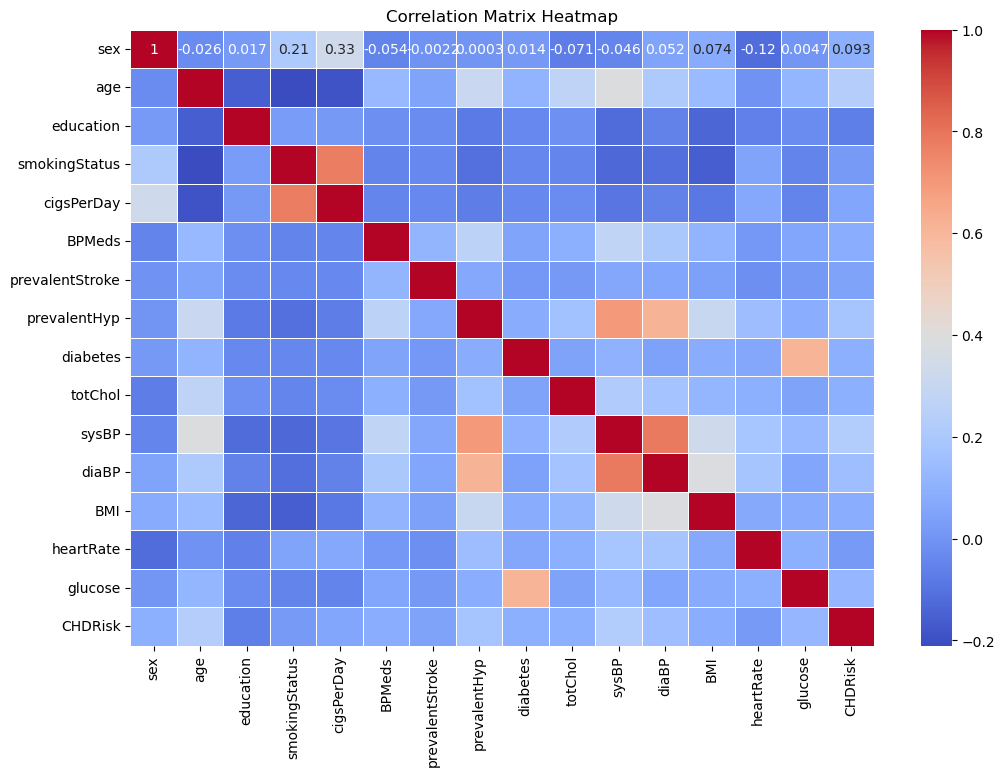

In [16]:
# Visualizing the correlation matrix for eaasier interpretation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Exploring multicolinearity within the dataset

In [17]:
# Calculating the Variance Inflation Factor (VIF) to detect multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
features = df_cleaned.drop(columns=['CHDRisk'])
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# Display VIF data
print(vif_data)


            Feature         VIF
0               sex    2.162943
1               age   40.594734
2         education    4.649186
3     smokingStatus    4.940616
4        cigsPerDay    4.301054
5            BPMeds    1.141968
6   prevalentStroke    1.023491
7      prevalentHyp    2.391362
8          diabetes    1.586368
9           totChol   32.106800
10            sysBP  137.826436
11            diaBP  136.242724
12              BMI   45.312691
13        heartRate   38.574423
14          glucose   19.758047


VIF values greater than 10 suggest high multicollinearity, which can inflate the standard errors and make it difficult to determine the individual effect of correlated predictors. These features might need to be removed or combined to address multicollinearity.